## Course: DSC530
## Assignment: 4.2, Probability Mass Functions and Cumulative Distribution Functions
## Name: Laura Hoffmann
## Date: 9/25/2020

## Setup

In [1]:
from __future__ import print_function, division

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot
import random

# 3-1

### Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the respondents' households.

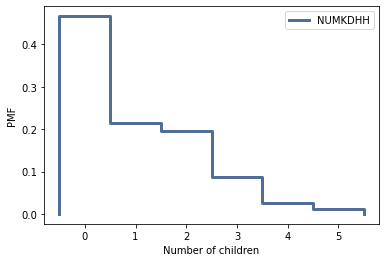

In [2]:
resp = nsfg.ReadFemResp()
PMF = thinkstats2.Pmf(resp.numkdhh, label='NUMKDHH')
thinkplot.Pmf(PMF)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

### Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

### Plot the actual and biased distributions, and compute their means.

In [3]:
def BiasPmf(pmf, label=''):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

1.024205155043831
2.403679100664282


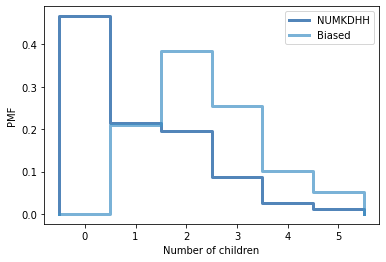

In [4]:
Biased = BiasPmf(PMF, label='Biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([PMF, Biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')
print(PMF.Mean())
print(Biased.Mean())

# 3-2

### Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [5]:
def PmfMean(pmf):
    return sum(p * x for x, p in pmf.Items())

def PmfVar(pmf, mu=None):
    if mu is None:
            mu = pmf.Mean()

    return sum(p * (x-mu)**2 for x, p in pmf.Items())

print(PmfMean(PMF))
print(PmfMean(Biased))

print(PmfVar(PMF))
print(PmfVar(Biased))

1.024205155043831
2.403679100664282
1.4128643263531195
1.1732721055059874


# 4-1

In [6]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

def PercentileRank(scores, your_score):
    count = 0 
    for score in scores:
        if score <= your_score:
            count += 1
    
    percentile_rank = 100 * count / len(scores)
    return percentile_rank

print(PercentileRank(others.birthwgt_lb, 8.69))

89.82048574445618


### Discovering my percentile wasn't surprising, I knew I was a heavy baby at 8 lbs. 11 ounces. However I thought it was hilarious that I was supposed to call my mother and apologize if I was in the 90th or higher percentile but I was right on the edge at 89.8 so I didn't need to call and apologize. 

# 4-2

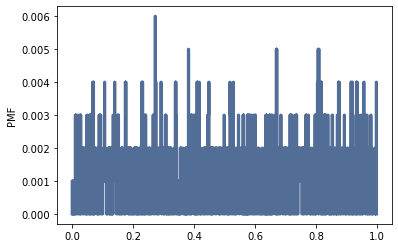

In [7]:
rands = []
for num in range(0,1000):
    rands.append(round(random.random(),3))
    
randomPMF = thinkstats2.Pmf(rands)
thinkplot.Pmf(randomPMF)
thinkplot.Config(ylabel='PMF')

### This PMF shows a pretty normal/uniform distribution with just a few numbers receiving higher probability than others. But overall, because the qunatity of random numbers is so high there is more uniformity. With more random data points there will be more uniformity.

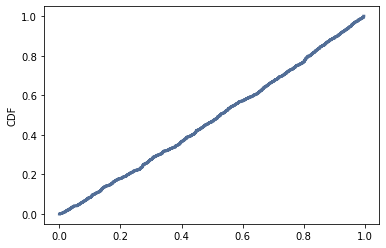

In [8]:
randomCDF = thinkstats2.Cdf(rands)
thinkplot.Cdf(randomCDF)
thinkplot.Config(ylabel='CDF')

### The CDF shows almost perfectly uniform distribution with a straight line.